#### 1. Setup (Run Once)

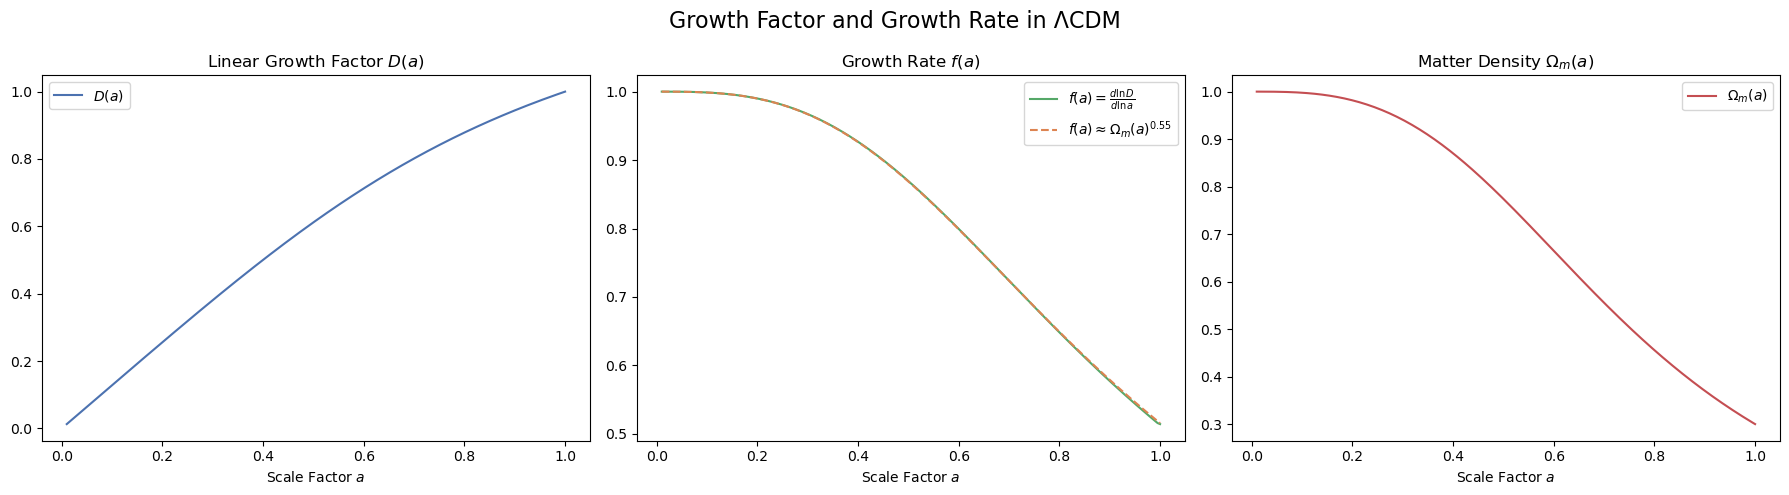

In [1]:
# from cosmological_helpers import plot_growth_quantities
# from grids import create_257_cube_grid, create_128_cube_grid

# plot_growth_quantities()
# create_257_cube_grid()
# _ = create_128_cube_grid()

#### 2. Tidal Tensor Today (128 cube grid)

b =  1.1965736087100474


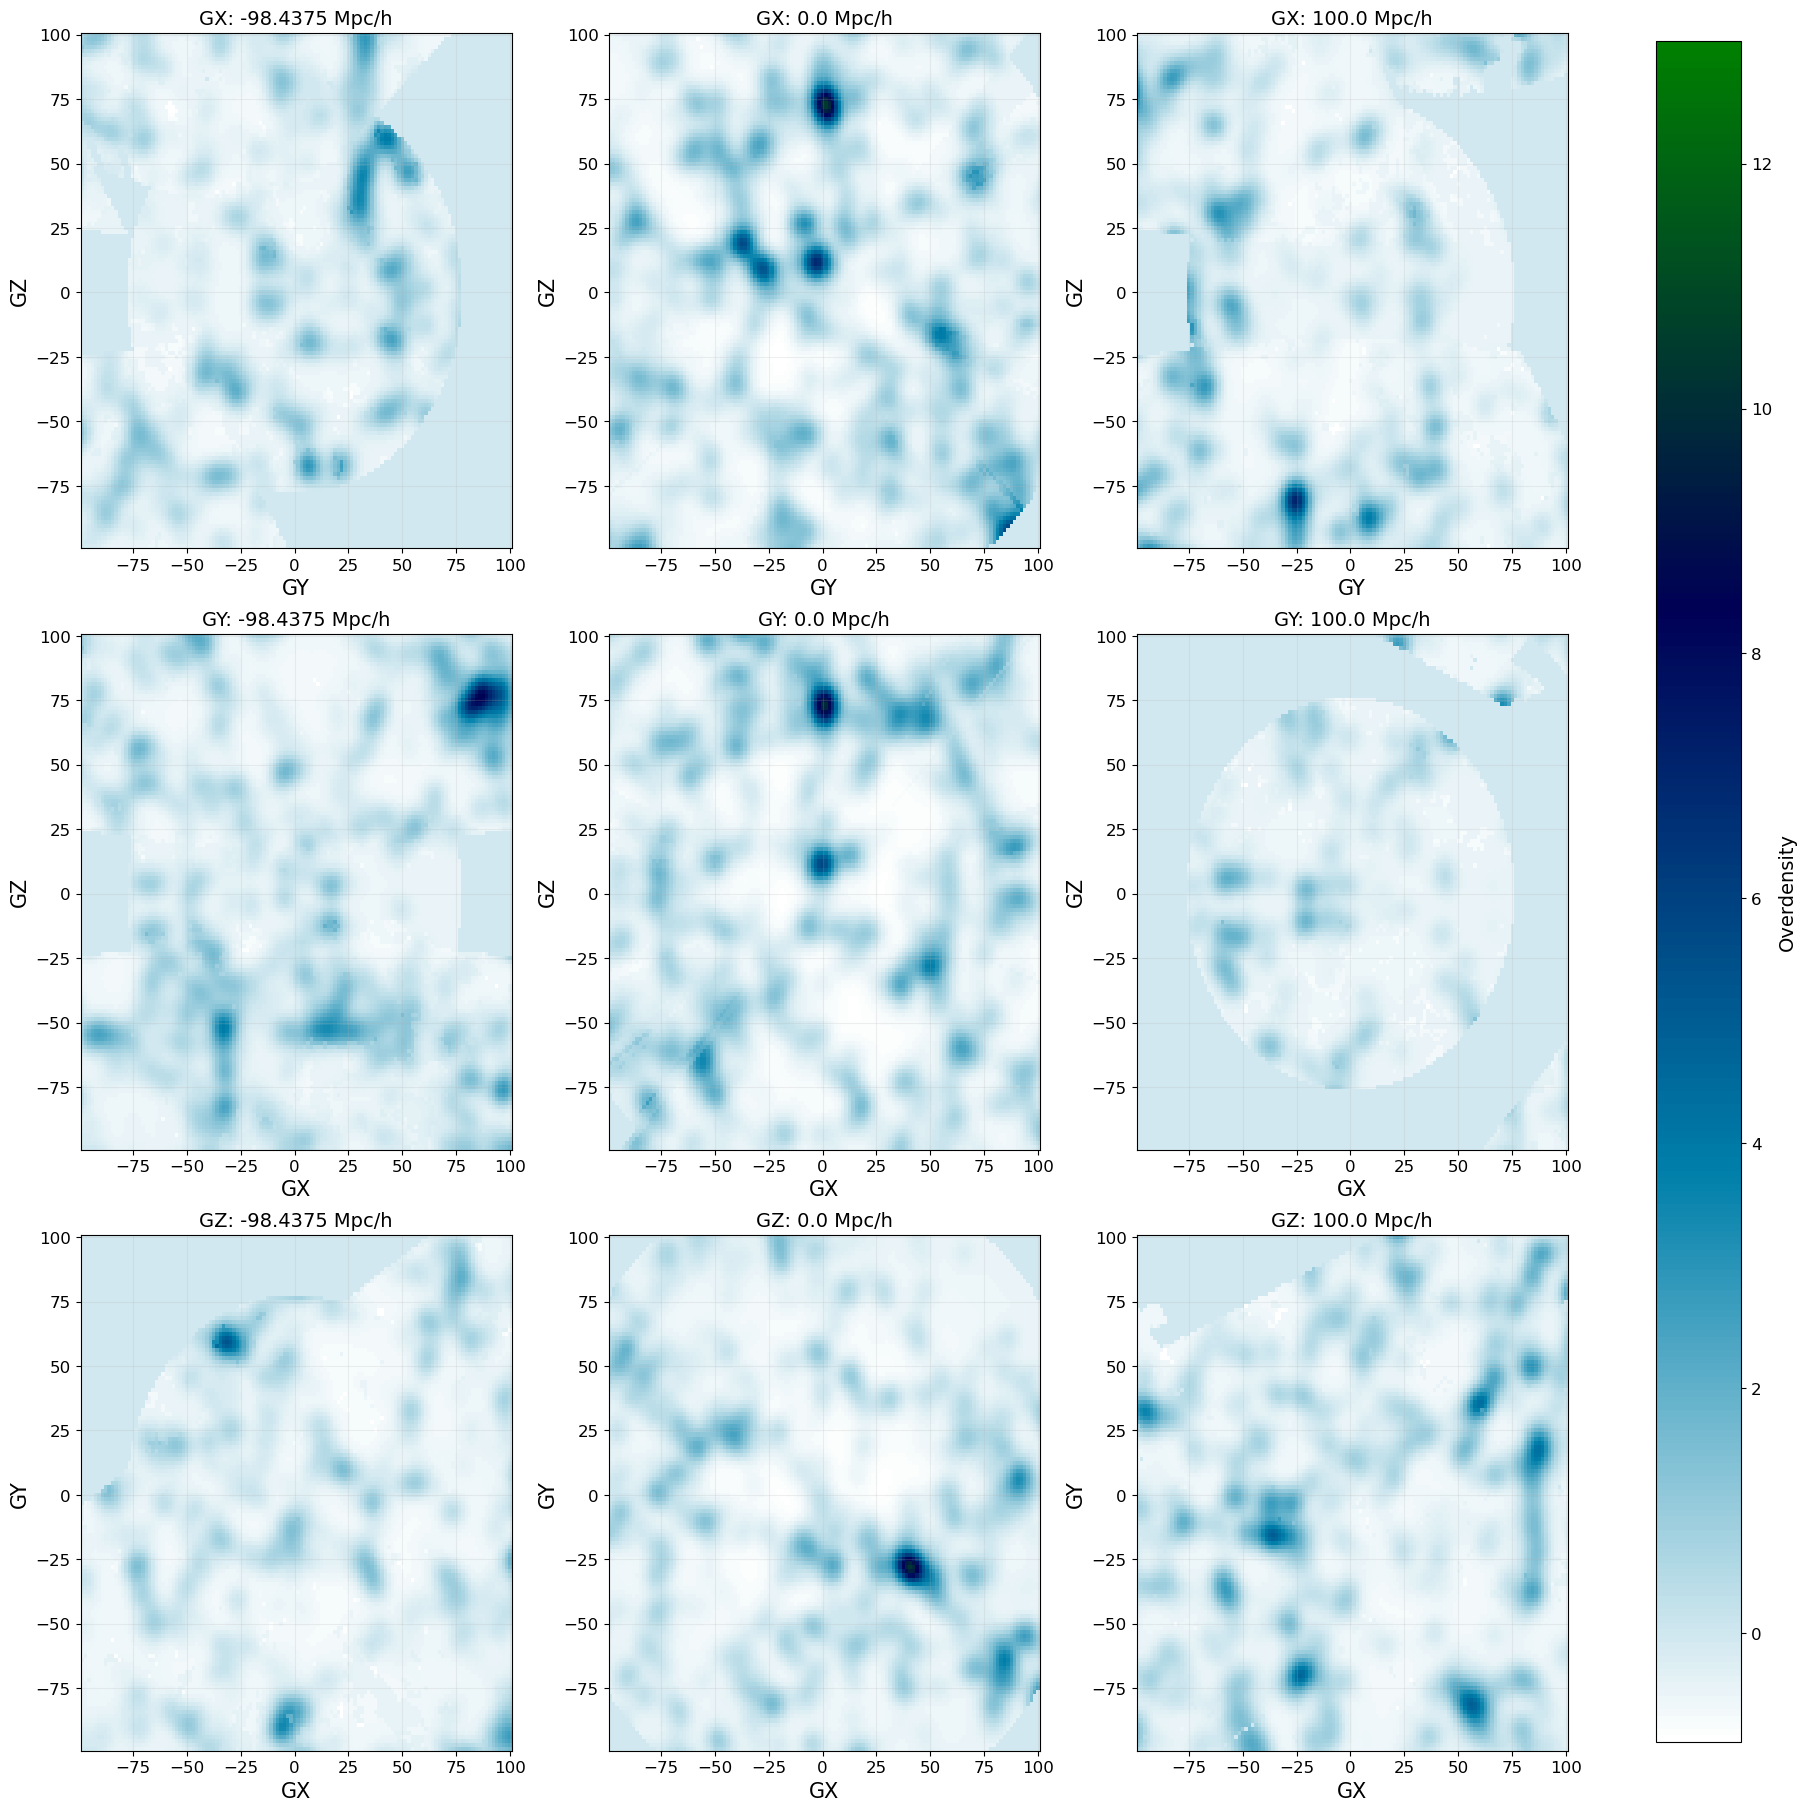

Tidal Tensor at LG in Galactic Coordinates: 
[[ 0.72002496  0.38184911 -0.13567673]
 [ 0.38184911  0.366401    0.27995355]
 [-0.13567673  0.27995355 -0.89768653]]
Eigenvalues: 
[-0.98459604  0.20856646  0.964769  ]
Sum of Eigenvalues:  0.1887394211811959
Sum of Eigenvalues is equal to overdensity at all points on the grid: 
True
Eigenvectors: 
[ 0.12955712 -0.23617824  0.96303416]
[-0.52950895  0.80466642  0.26857443]
[-0.83835269 -0.54473093 -0.02080823]
Euler Angles:  303.014338657655 88.80769011707025 74.41708554758833
Tidal Tensor at LG in Supergalactic Coordinates: 
[[ 0.17728055  0.31053651 -0.17463819]
 [ 0.31053651 -0.90075618 -0.08636935]
 [-0.17463819 -0.08636935  0.91221505]]
Eigenvectors SG: 
[ 0.25527507 -0.96665086 -0.02051244]
[0.9345517  0.24124797 0.2615579 ]
[-0.24788659 -0.08593915  0.96496979]
Euler Angles SG:  109.12078533188325 15.21020209125347 175.51580838792157


In [1]:
import numpy as np
import pandas as pd
from visualize_slices import plot_slices
from cosmological_helpers import f, beta_star
from ellipsoidal_tt_visualization import vizualize_tt_around_LG
from tidal_tensor_calculation import calculate_phi_k_from_overdensity_field, calculate_tidal_tensor_from_phi_k, \
    calculate_eigenvalues_and_eigenvectors, calculate_T_SG_eigenvectors, calculate_euler_angles

b = f(1.0)/beta_star
print("b = ", b)

df = pd.read_csv('./Data/2M++Grids/128_cube_grid.csv')
df["Overdensity_mean_removed"] = df["Overdensity"] - df["Overdensity"].mean()
df["Overdensity_mass"] = df["Overdensity_mean_removed"]/b
df.drop(columns=["Overdensity_mean_removed", "Overdensity"], inplace=True)
df.rename(columns={"Overdensity_mass": "Overdensity"}, inplace=True)
df_original = df.copy(deep=True)
df = df_original.copy(deep=True)

# Visualize Slices
fig = plot_slices(df, center_idx=63, vmax=13)

# Calculate Tidal Tensor Today
df, phi_k = calculate_phi_k_from_overdensity_field(df, a=1.0, N=128, L=200000., verbose=False)
df, T_ij = calculate_tidal_tensor_from_phi_k(df, phi_k, a=1.0, N=128, L=200000., verbose=False)
df, _, _ = calculate_eigenvalues_and_eigenvectors(df, T_ij, N=128)
df = calculate_T_SG_eigenvectors(df)
df = calculate_euler_angles(df)

df_LG = df[(df["GX"] == 0) & (df["GY"] == 0) & (df["GZ"] == 0)]

print("Tidal Tensor at LG in Galactic Coordinates: ")
print(df_LG["T"].values[0])

print("Eigenvalues: ")
print(df_LG["eigenvalues"].values[0])

print("Sum of Eigenvalues: ", df_LG["eigenvalues"].values[0].sum())

print("Sum of Eigenvalues is equal to overdensity at all points on the grid: ")
print(np.allclose(df["T"].apply(lambda x: np.trace(x)).values, df["Overdensity"]))

print("Eigenvectors: ")
print(df_LG["eigenvector_1"].values[0])
print(df_LG["eigenvector_2"].values[0])
print(df_LG["eigenvector_3"].values[0])

print("Euler Angles: ", df_LG["alpha"].values[0] * 180/ np.pi, df_LG["beta"].values[0] * 180/ np.pi, df_LG["gamma"].values[0] * 180/ np.pi)

print("Tidal Tensor at LG in Supergalactic Coordinates: ")
print(df_LG["T_SG"].values[0])

print("Eigenvectors SG: ")
print(df_LG["eigenvector_1_SG"].values[0])
print(df_LG["eigenvector_2_SG"].values[0])
print(df_LG["eigenvector_3_SG"].values[0])

print("Euler Angles SG: ", df_LG["alpha_SG"].values[0] * 180/ np.pi, df_LG["beta_SG"].values[0] * 180/ np.pi, df_LG["gamma_SG"].values[0] * 180/ np.pi)

# vizualize_tt_around_LG(df)    # Uncomment to visualize tidal tensor ellipsoids around the LG 

#### 3. Tidal Tensor Evolution with Smoothing Scale

Smoothing scales: [ 4.   5.2  6.4  7.6  8.8 10. ]


100%|██████████| 6/6 [00:00<00:00, 15.29it/s]


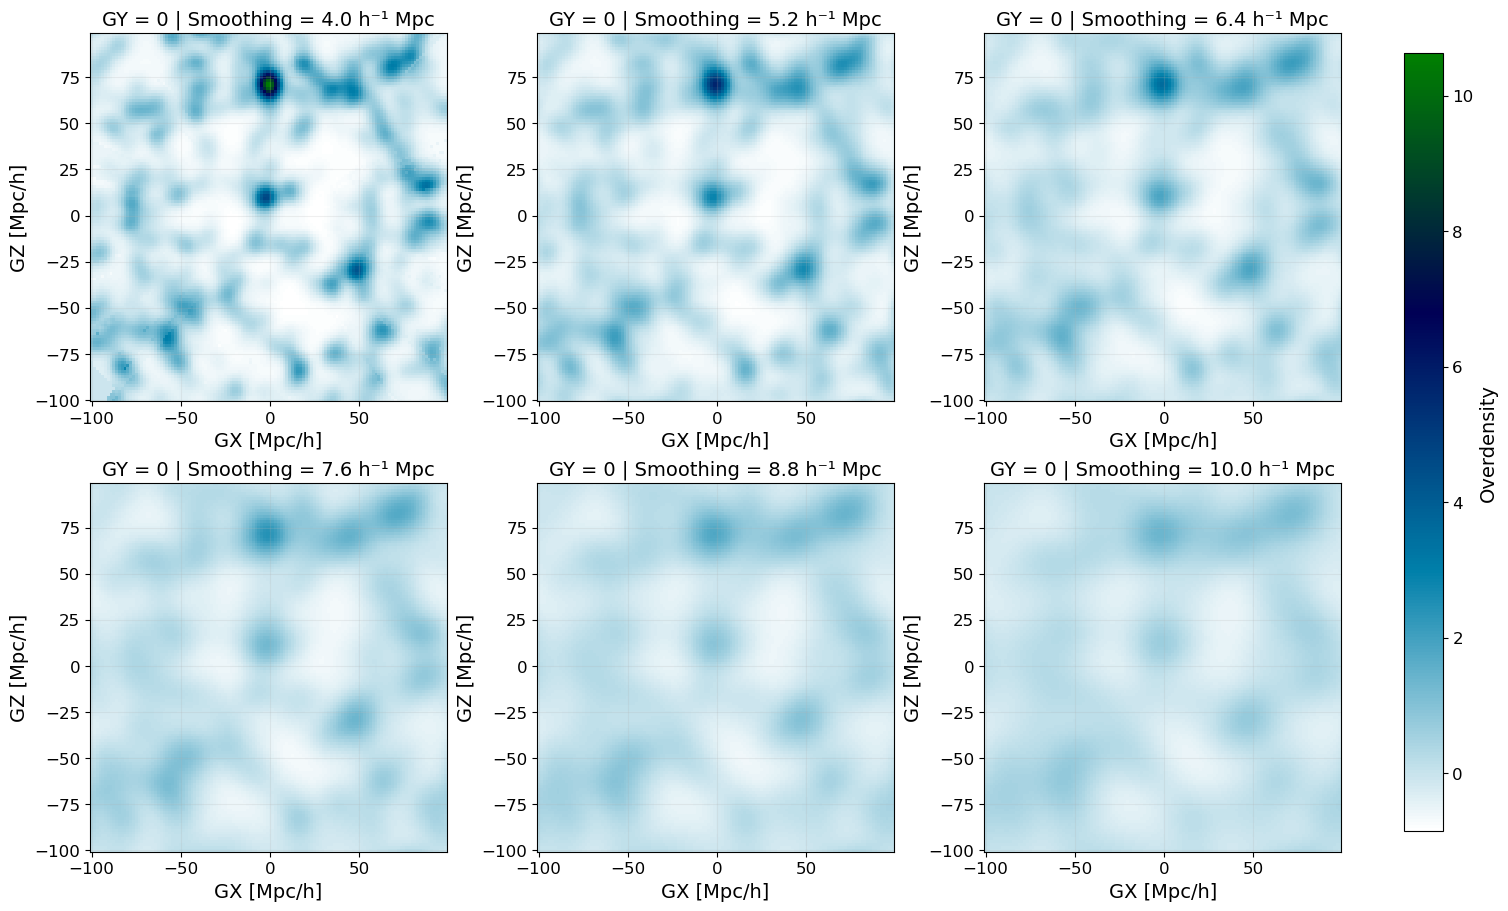

Considering different smoothing scales..: 100%|██████████| 6/6 [15:18<00:00, 153.07s/it]


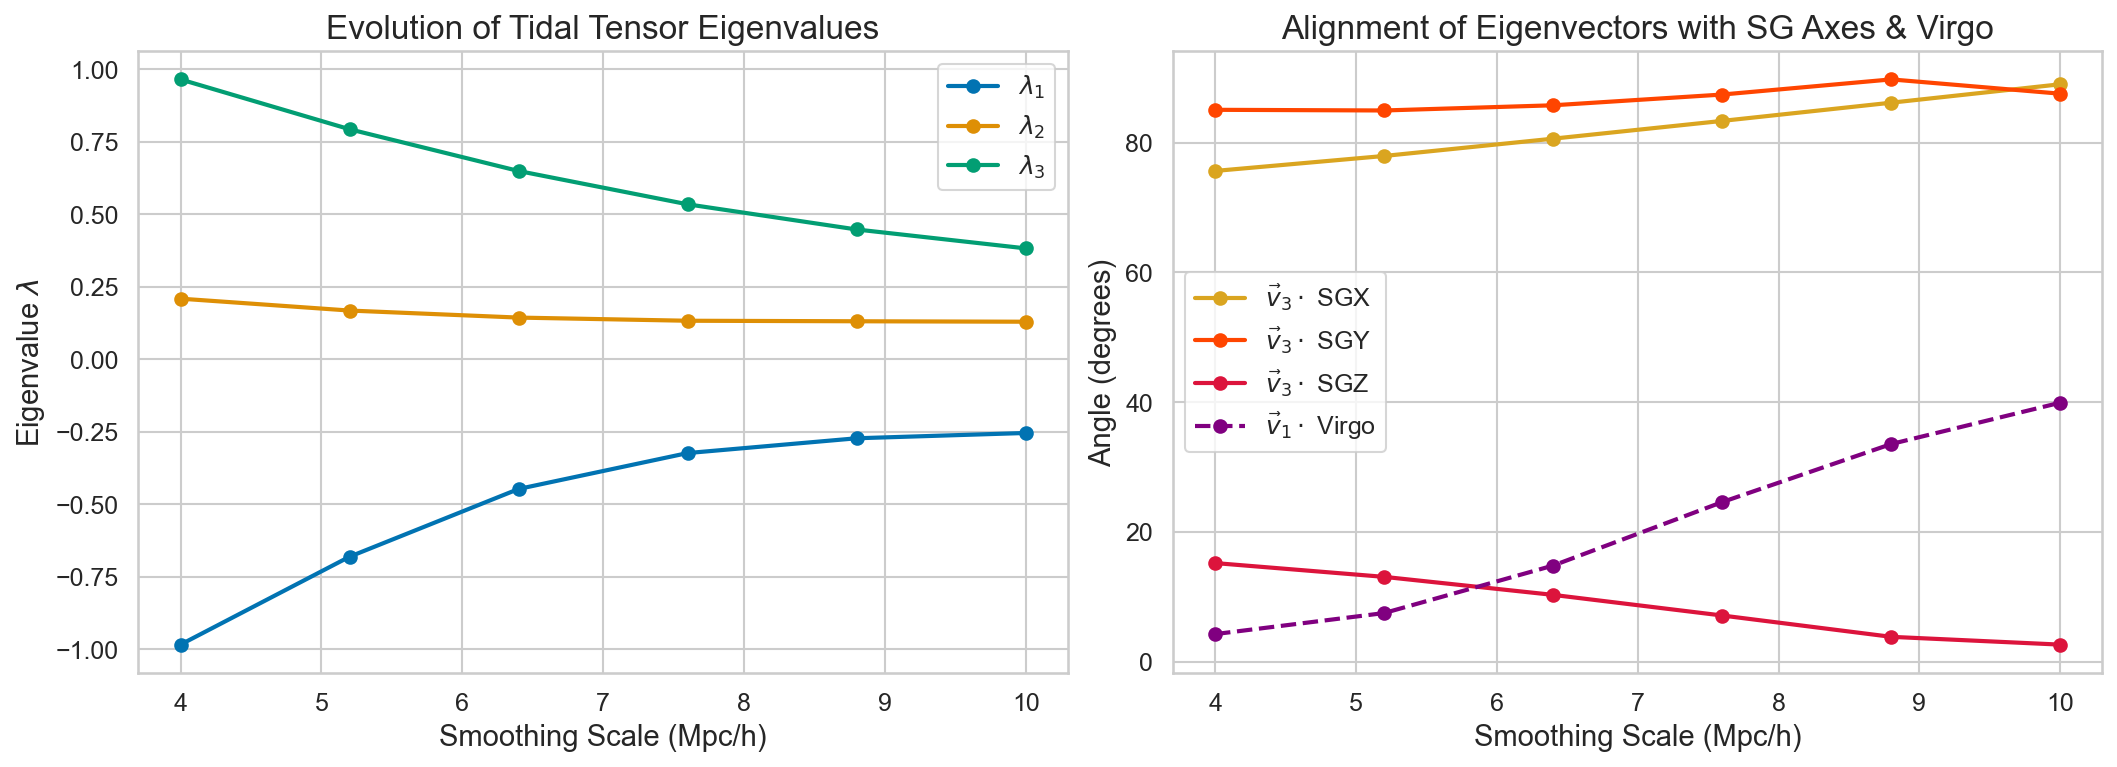

In [2]:
from visualize_slices import create_and_plot_slices_with_smoothing
from tidal_tensor_with_smoothing import tidal_tensor_with_smoothing_scales, plot_tidal_tensor_evolution_with_smoothing_scales

df = df_original.copy(deep=True)

df_dict = create_and_plot_slices_with_smoothing(df, N=128, L=200000.0, plot=True)
df_all = tidal_tensor_with_smoothing_scales(df_dict)
_ = plot_tidal_tensor_evolution_with_smoothing_scales(df_all)

#### 4. Tidal Tensor Evolution with Volume Considered

[  4.      7.125  10.25   13.375  16.5    19.625  22.75   25.875  29.
  32.125  35.25   38.375  41.5    44.625  47.75   50.875  54.     57.125
  60.25   63.375  66.5    69.625  72.75   75.875  79.     82.125  85.25
  88.375  91.5    94.625  97.75  100.875 104.    107.125 110.25  113.375
 116.5   119.625 122.75  125.875 129.    132.125 135.25  138.375 141.5
 144.625 147.75 ]


Considering different volumes..: 100%|██████████| 47/47 [14:40<00:00, 18.74s/it]


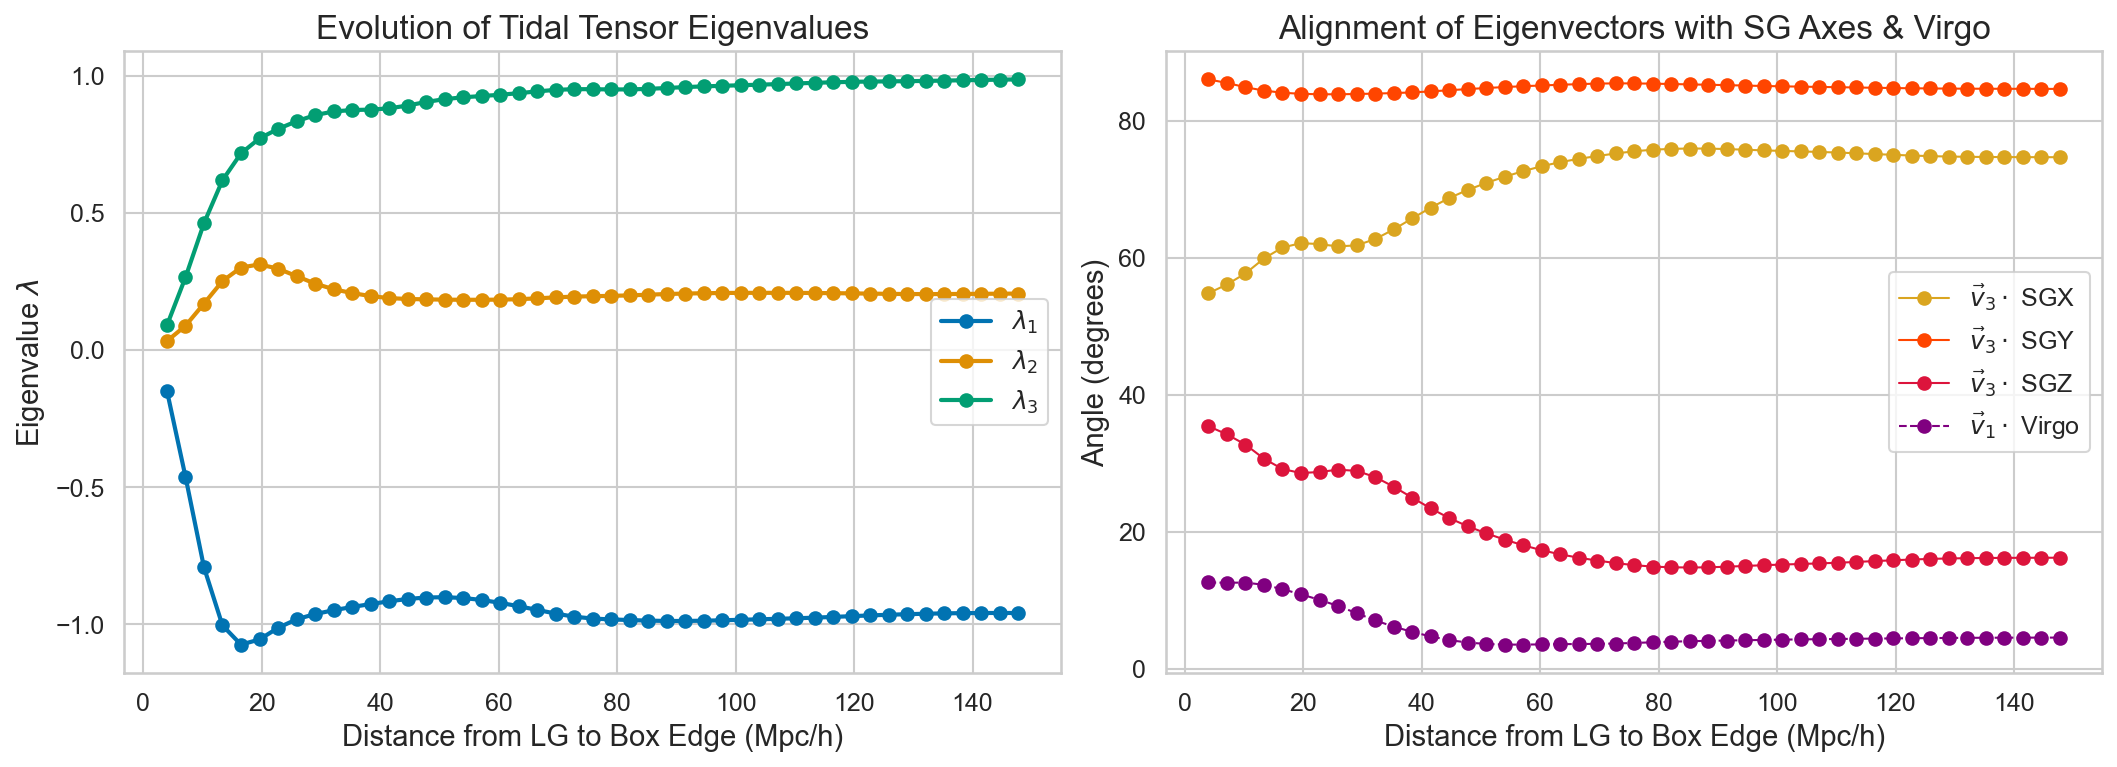

In [1]:
import pandas as pd
from tidal_tensor_with_distance import calculate_tidal_tensor_atLG_with_distance, plot_tidal_tensor_evolution_with_distance

df = pd.read_csv('./Data/2M++Grids/257_cube_grid.csv')
df_all = calculate_tidal_tensor_atLG_with_distance(df)
plot_tidal_tensor_evolution_with_distance(df_all)

#### 5. Generate Initial Conditions for Simulation

In [5]:
# df = df_original.copy(deep=True)


#### Simulation Results (CIC Density Grid Reconstruction)

In [ ]:
import re
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from utils_new import check_simulation_results

TimeBetSnapshot = 1.112
TimeOfFirstSnapshot = 0.0078125


def create_delta_grids(folder_name, N=128., GS = 400000./256., L=200000.0):
    snapshots = []
    snapshot_folder = f"./Simulations/{folder_name}/Output"
    regex = re.compile(r"snapshot3halosc_(\d+)\.hdf5")
    for fname in sorted(os.listdir(snapshot_folder)):
        match = regex.match(fname)
        if match:
            snapshots.append(match.group(1))

    for snap in tqdm(snapshots, desc="Reading snapshots"):
            df = check_simulation_results(folder_name, snapshotnumber=snap, plots=False, N=N, L=L, GS=GS, verbose=False)

            df = df[["X", "Y", "Z"]].copy(deep=True)
            df["X"] = df["X"]/GS
            df["Y"] = df["Y"]/GS
            df["Z"] = df["Z"]/GS

            df["nx"] = np.floor(df["X"] + 0.5)
            df["ny"] = np.floor(df["Y"] + 0.5)
            df["nz"] = np.floor(df["Z"] + 0.5)

            df["fx"] = df["X"] + 0.5 - df["nx"]
            df["fy"] = df["Y"] + 0.5 - df["ny"]
            df["fz"] = df["Z"] + 0.5 - df["nz"]

            df.loc[df["nx"] == 0, "nx"] = 128
            df.loc[df["ny"] == 0, "ny"] = 128
            df.loc[df["nz"] == 0, "nz"] = 128

            df["delta_111"] = (1-df["fx"]) * (1-df["fy"]) * (1-df["fz"])
            df["delta_112"] = (1-df["fx"]) * (1-df["fy"]) * df["fz"]
            df["delta_121"] = (1-df["fx"]) * df["fy"] * (1-df["fz"])
            df["delta_122"] = (1-df["fx"]) * df["fy"] * df["fz"]
            df["delta_211"] = df["fx"] * (1-df["fy"]) * (1-df["fz"])
            df["delta_212"] = df["fx"] * (1-df["fy"]) * df["fz"]
            df["delta_221"] = df["fx"] * df["fy"] * (1-df["fz"])
            df["delta_222"] = df["fx"] * df["fy"] * df["fz"]

            delta = np.zeros((128, 128, 128), dtype=np.float32) - 1

            for idx, row in df.iterrows():
                nx = int(row["nx"])
                ny = int(row["ny"])
                nz = int(row["nz"])

                nxx = nx + 1 if nx + 1 <= 128 else 1
                nyy = ny + 1 if ny + 1 <= 128 else 1
                nzz = nz + 1 if nz + 1 <= 128 else 1

                if not (1 <= nx <= 128 and 1 <= ny <= 128 and 1 <= nz <= 128):
                    raise ValueError(f"Invalid grid indices at row {idx}: nx={nx}, ny={ny}, nz={nz}")
                if not (1 <= nxx <= 128 and 1 <= nyy <= 128 and 1 <= nzz <= 128):
                    raise ValueError(f"Invalid neighbor grid indices at row {idx}: nxx={nxx}, nyy={nyy}, nzz={nzz}")

                delta[nx-1, ny-1, nz-1] += row["delta_111"]
                delta[nx-1, ny-1, nzz-1] += row["delta_112"]
                delta[nx-1, nyy-1, nz-1] += row["delta_121"]
                delta[nx-1, nyy-1, nzz-1] += row["delta_122"]
                delta[nxx-1, ny-1, nz-1] += row["delta_211"]
                delta[nxx-1, ny-1, nzz-1] += row["delta_212"]
                delta[nxx-1, nyy-1, nz-1] += row["delta_221"]
                delta[nxx-1, nyy-1, nzz-1] += row["delta_222"]

            new_df = pd.DataFrame()

            X = Y = Z = np.arange(0, 128) * GS * 1000. + (GS * 1000./2) 
            GX, GY, GZ = np.meshgrid(X, Y, Z, indexing='ij')
            new_df["GX"] = GX.flatten()
            new_df["GY"] = GY.flatten()
            new_df["GZ"] = GZ.flatten()

            new_df["Overdensity"] = delta.flatten()

            new_df.to_csv(f"./Simulations/{folder_name}/RecreatedDelta/snapshot_{snap}.csv", index=False)


create_delta_grids("AdrianScript200Phi")

#### Tidal Tensor Non-Linear Evolution

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from utils_new import check_simulation_results, calculate_euler_angles, calculate_tidal_tensor_from_phi_k, \
    calculate_eigenvalues_and_eigenvectors, calculate_phi_k_from_overdensity_field, calculate_T_SG_eigenvectors, \
    calculate_smoothed_phi_k_from_phi_k, calculate_smoothed_overdensity_field


TimeBetSnapshot = 1.112
TimeOfFirstSnapshot = 0.0078125


def create_delta_grids(folder_name, N=128., GS = 400000./256., L=200000.0):
    snapshots = []
    snapshot_folder = f"./Simulations/{folder_name}/Output"
    regex = re.compile(r"snapshot3halosc_(\d+)\.hdf5")
    for fname in sorted(os.listdir(snapshot_folder)):
        match = regex.match(fname)
        if match:
            snapshots.append(match.group(1))

    for snap in tqdm(snapshots, desc="Reading snapshots"):
            df = check_simulation_results(folder_name, snapshotnumber=snap, plots=False, N=N, L=L, GS=GS, verbose=False)

            df = df[["X", "Y", "Z"]].copy(deep=True)
            df["X"] = df["X"]/GS
            df["Y"] = df["Y"]/GS
            df["Z"] = df["Z"]/GS

            df["nx"] = np.floor(df["X"] + 0.5)
            df["ny"] = np.floor(df["Y"] + 0.5)
            df["nz"] = np.floor(df["Z"] + 0.5)

            df["fx"] = df["X"] + 0.5 - df["nx"]
            df["fy"] = df["Y"] + 0.5 - df["ny"]
            df["fz"] = df["Z"] + 0.5 - df["nz"]

            df.loc[df["nx"] == 0, "nx"] = 128
            df.loc[df["ny"] == 0, "ny"] = 128
            df.loc[df["nz"] == 0, "nz"] = 128

            df["delta_111"] = (1-df["fx"]) * (1-df["fy"]) * (1-df["fz"])
            df["delta_112"] = (1-df["fx"]) * (1-df["fy"]) * df["fz"]
            df["delta_121"] = (1-df["fx"]) * df["fy"] * (1-df["fz"])
            df["delta_122"] = (1-df["fx"]) * df["fy"] * df["fz"]
            df["delta_211"] = df["fx"] * (1-df["fy"]) * (1-df["fz"])
            df["delta_212"] = df["fx"] * (1-df["fy"]) * df["fz"]
            df["delta_221"] = df["fx"] * df["fy"] * (1-df["fz"])
            df["delta_222"] = df["fx"] * df["fy"] * df["fz"]

            delta = np.zeros((128, 128, 128), dtype=np.float32) - 1

            for idx, row in df.iterrows():
                nx = int(row["nx"])
                ny = int(row["ny"])
                nz = int(row["nz"])

                nxx = nx + 1 if nx + 1 <= 128 else 1
                nyy = ny + 1 if ny + 1 <= 128 else 1
                nzz = nz + 1 if nz + 1 <= 128 else 1

                if not (1 <= nx <= 128 and 1 <= ny <= 128 and 1 <= nz <= 128):
                    raise ValueError(f"Invalid grid indices at row {idx}: nx={nx}, ny={ny}, nz={nz}")
                if not (1 <= nxx <= 128 and 1 <= nyy <= 128 and 1 <= nzz <= 128):
                    raise ValueError(f"Invalid neighbor grid indices at row {idx}: nxx={nxx}, nyy={nyy}, nzz={nzz}")

                delta[nx-1, ny-1, nz-1] += row["delta_111"]
                delta[nx-1, ny-1, nzz-1] += row["delta_112"]
                delta[nx-1, nyy-1, nz-1] += row["delta_121"]
                delta[nx-1, nyy-1, nzz-1] += row["delta_122"]
                delta[nxx-1, ny-1, nz-1] += row["delta_211"]
                delta[nxx-1, ny-1, nzz-1] += row["delta_212"]
                delta[nxx-1, nyy-1, nz-1] += row["delta_221"]
                delta[nxx-1, nyy-1, nzz-1] += row["delta_222"]

            new_df = pd.DataFrame()

            X = Y = Z = np.arange(0, 128) * GS * 1000. + (GS * 1000./2) 
            GX, GY, GZ = np.meshgrid(X, Y, Z, indexing='ij')
            new_df["GX"] = GX.flatten()
            new_df["GY"] = GY.flatten()
            new_df["GZ"] = GZ.flatten()

            new_df["Overdensity"] = delta.flatten()

            new_df.to_csv(f"./Simulations/{folder_name}/RecreatedDelta/snapshot_{snap}.csv", index=False)


def evaluate_and_plot_tidal_tensor_evolution(folder_name, N=128, L=200000.0, GS=400000./256., phi=True):
    """
    Evaluate and plot the evolution of tidal tensor eigenvalues at a given particle location across snapshots.

    Parameters
    ----------
    folder_name : str
        Folder containing the simulation outputs.
    particle_index : int
        Row index of the particle to track.
    N : int
        Grid resolution.
    L : float
        Box size in km/s.
    GS : float
        Grid spacing in km/s.

    Returns
    -------
    df_all : pd.DataFrame
        Dataframe with particle data and eigenvalues at each snapshot.
    """
    results = []
    snapshot_folder = f"./Simulations/{folder_name}/RecreatedDelta"
    regex = re.compile(r"snapshot_(\d+)\.csv")

    # Detect all snapshot numbers
    snapshots = sorted([
        match.group(1)
        for fname in os.listdir(snapshot_folder)
        if (match := regex.match(fname))
    ])

    # Process each snapshot
    for snap in tqdm(snapshots, desc="Reading snapshots"):
        df = pd.read_csv(f"./Simulations/{folder_name}/RecreatedDelta/snapshot_{snap}.csv")
        time = TimeOfFirstSnapshot * TimeBetSnapshot**int(snap)
        a = time

        df = calculate_smoothed_overdensity_field(df)
        df, phi_k = calculate_phi_k_from_overdensity_field(df, a=a, N=128, L=200000., verbose=False)
        # df, phi_k = calculate_smoothed_phi_k_from_peculiar_velocity_field(df, a=a, verbose=False)
        # df, phi_k = calculate_smoothed_phi_k_from_phi_k(df, phi_k, a=a, verbose=False)
        df, T_ij = calculate_tidal_tensor_from_phi_k(df, phi_k, a=a, verbose=False)
        df, _, _ = calculate_eigenvalues_and_eigenvectors(df, T_ij)

        # coords = df[["X", "Y", "Z"]].values
        # target = np.array(fixed_coordinates)
        # dists = np.linalg.norm(coords - target, axis=1)
        # particle_index = np.argmin(dists)

        particle_index = 63 * 128**2 + 63 * 128 + 63

        # Extract specific particle and track
        particle = df.iloc[particle_index].copy()
        particle["a"] = a
        particle["snapshot"] = snap
        results.append(particle)

    df_all = pd.DataFrame(results)
    return df_all


def plot_eigenvalue_evolution_plotly(df_all):
    """
    Plot eigenvalue evolution using Plotly.
    """
    eigen_df = df_all["eigenvalues"].apply(pd.Series)
    eigen_df.columns = ["e1", "e2", "e3"]
    a_vals = df_all["a"].values

    fig = go.Figure()
    for i, label in enumerate(["e1", "e2", "e3"]):
        fig.add_trace(go.Scatter(
            x=a_vals,
            y=eigen_df[label],
            mode='lines+markers',
            name=f"Eigenvalue {i+1}",
            line=dict(width=2)
        ))

    fig.update_layout(
        title="Evolution of Tidal Tensor Eigenvalues for Particle",
        xaxis_title="Scale Factor (a)",
        yaxis_title="Eigenvalue",
        legend_title="Eigenvalue Index",
        font=dict(family="Arial", size=14),
        width=800,
        height=500,
        template="plotly_white"
    )

    fig.show()


create_delta_grids("AdrianScript200Phi")
df_all = evaluate_and_plot_tidal_tensor_evolution(folder_name="AdrianScript200Phi")
plot_eigenvalue_evolution_plotly(df_all)

Reading snapshots: 100%|██████████| 47/47 [07:18<00:00,  9.32s/it]
